# Import and Load DataSet

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
from scipy.io import loadmat
mat = loadmat("ex7data1.mat")
X = mat["X"]

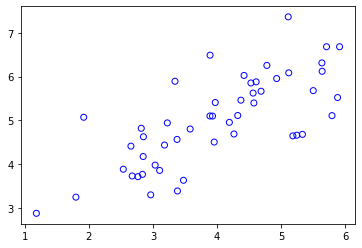

In [5]:
plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")

# Feature Normalization

In [6]:
def featureNormalize(X):
   
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    
    X_norm = (X - mu)/sigma
    
    return X_norm, mu , sigma

# Eigen Vectors

In [15]:
def pca(X):
    
    m,n = X.shape[0], X.shape[1]
    
    sigma = 1/m * X.T @ X
    
    U,S,V = svd(sigma)
    
    return U,S,V

(2, 8)

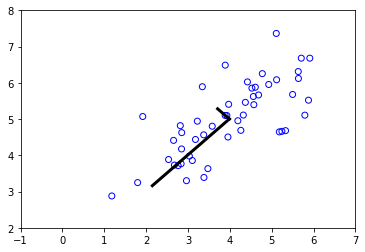

In [13]:
X_norm,mu,std = featureNormalize(X)
U,S = pca(X_norm)[:2]

plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")
plt.plot([mu[0],(mu+1.5*S[0]*U[:,0].T)[0]],[mu[1],(mu+1.5*S[0]*U[:,0].T)[1]],color="black",linewidth=3)
plt.plot([mu[0],(mu+1.5*S[1]*U[:,1].T)[0]],[mu[1],(mu+1.5*S[1]*U[:,1].T)[1]],color="black",linewidth=3)
plt.xlim(-1,7)
plt.ylim(2,8)

# Project Data

In [20]:
def projectData(X, U, K):

    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
    
    return Z

In [21]:
K=1
Z = projectData(X_norm, U, K)
print("Projection of the first example:",Z[0][0])

Projection of the first example: 1.4963126084578517


# Recover Data

In [22]:
def recoverData(Z, U, K):
    
    m,n = Z.shape[0],U.shape[0]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
    
    return X_rec

In [23]:
X_rec  = recoverData(Z, U, K)
print("Approximation of the first example:",X_rec[0,:])

Approximation of the first example: [-1.05805279 -1.05805279]


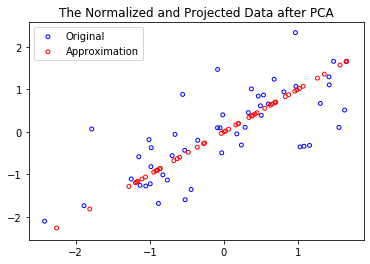

In [25]:
plt.scatter(X_norm[:,0],X_norm[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=15)
plt.scatter(X_rec[:,0],X_rec[:,1],marker="o",label="Approximation",facecolors="none",edgecolors="r",s=15)
plt.title("The Normalized and Projected Data after PCA")
plt.legend()